

# Objective
The goal of this data analysis project using sql would be to identify opportunities to increase the occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline.


# Importing Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [2]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [12]:
# extracting table names from the database
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
print('List of Tables present in the Database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of Tables present in the Database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration 

In [14]:
airports_data = pd.read_sql_query(f"""SELECT * FROM airports_data""", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [15]:
boarding_passes = pd.read_sql_query(f"""SELECT * FROM boarding_passes""", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [16]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings """, connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [3]:
aircrafts_data = pd.read_sql_query(f"""SELECT * FROM aircrafts_data""", connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [8]:
flights = pd.read_sql_query(f"""SELECT * FROM flights  """, connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [9]:
seats = pd.read_sql_query(f"""SELECT * FROM seats  """, connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [28]:
ticket_flights = pd.read_sql_query(f"""SELECT * FROM ticket_flights  """, connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [11]:
tickets = pd.read_sql_query(f"""SELECT * FROM tickets  """, connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [7]:
for table in table_list:
    print("\ntable: " + table)
    columns_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in columns_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'integer')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'text')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'integer')
('boarding_no', 'integer')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'integer')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

# Data Cleaning

In [8]:
# checking for missing values in each column for every table
for table in table_list:
    print(f'\nMissing Values in table {table}')
    df_table = pd.read_sql_query(f"""SELECT * FROM {table}""", connection)
    print(df_table.isnull().sum())
    


Missing Values in table aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Missing Values in table airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Missing Values in table boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Missing Values in table bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

Missing Values in table flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Missing Values in table seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Missing Values in table ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             

# Data Visualization

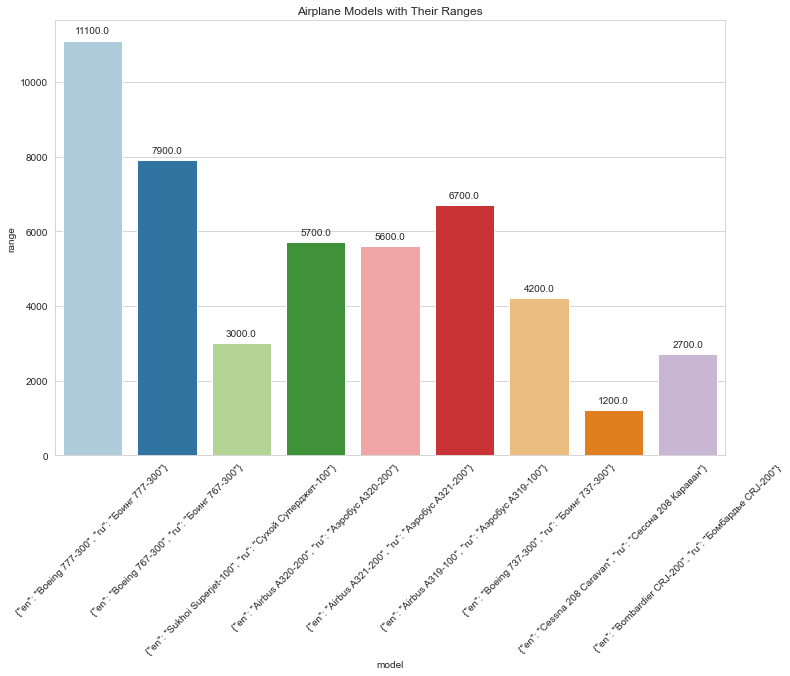

In [29]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='model', y='range', data=aircrafts_data, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Airplane Models with Their Ranges')
plt.xticks(rotation=45)
plt.show()

In [23]:
df = pd.read_sql_query("""SELECT aircraft_code, COUNT(*) as num_seats FROM seats
                        GROUP BY aircraft_code HAVING num_seats >100""", connection)

df.to_csv('aircraft_seats.csv')


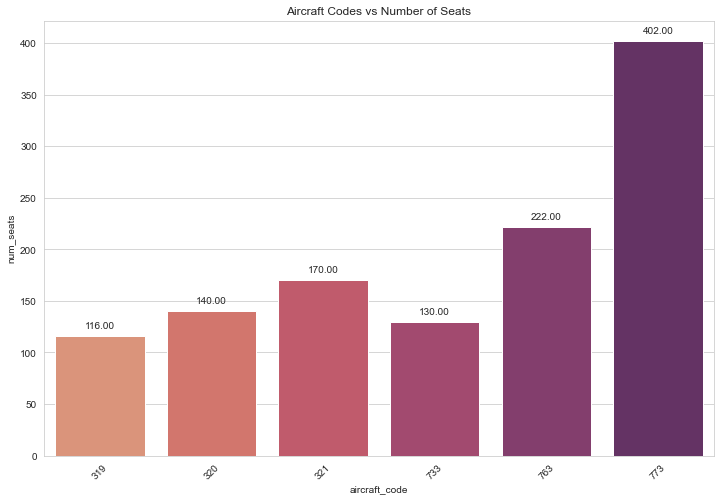

In [25]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='aircraft_code', y='num_seats', data=df, palette='flare')

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Aircraft Codes vs Number of Seats')
plt.xticks(rotation=45)
plt.show()

In [20]:
crafts = pd.read_sql_query("""SELECT aircraft_code, model
                        FROM aircrafts_data
                        where aircraft_code IN (319, 320, 321, 733, 763, 773);""", connection)
crafts
     

,aircraft_code,model
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}"
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}"
2,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-..."
3,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-..."
4,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-..."
5,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}"


**As expected, "Boeing 777-300" has the maximum number of seats, 402!!**

# Basic Analysis 

**How many planes have more than 100 seats?**

In [14]:
pd.read_sql_query(f"""SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                        GROUP BY aircraft_code 
                        HAVING num_seats > 100 
                        ORDER BY num_seats DESC""", connection)

,aircraft_code,num_seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


**How the number of tickets booked and total amount earned changed with the time.**

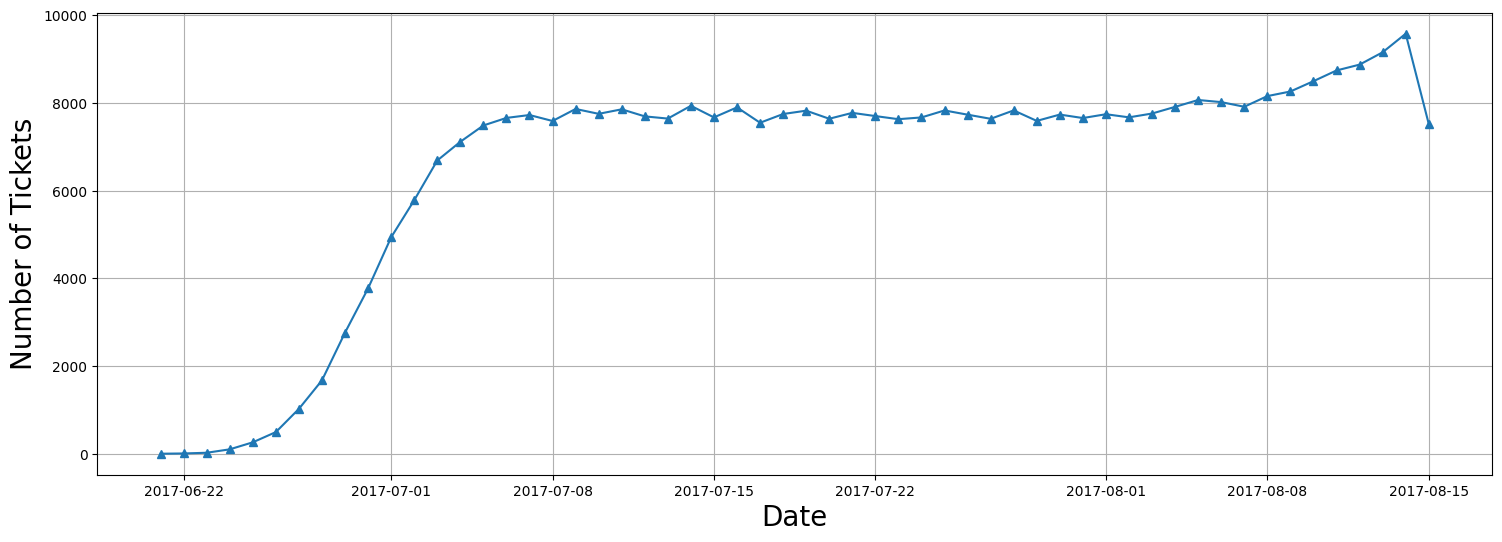

In [15]:
tickets = pd.read_sql_query(f"""SELECT *
                                    FROM tickets
                                    INNER JOIN bookings 
                                    ON tickets.book_ref=bookings.book_ref;""", connection)
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
x =  tickets.groupby('date')[['date']].count()
plt.figure(figsize = (18,6))
plt.plot(x.index,x['date'], marker = '^')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of Tickets', fontsize = 20)
plt.grid('b')
plt.show()

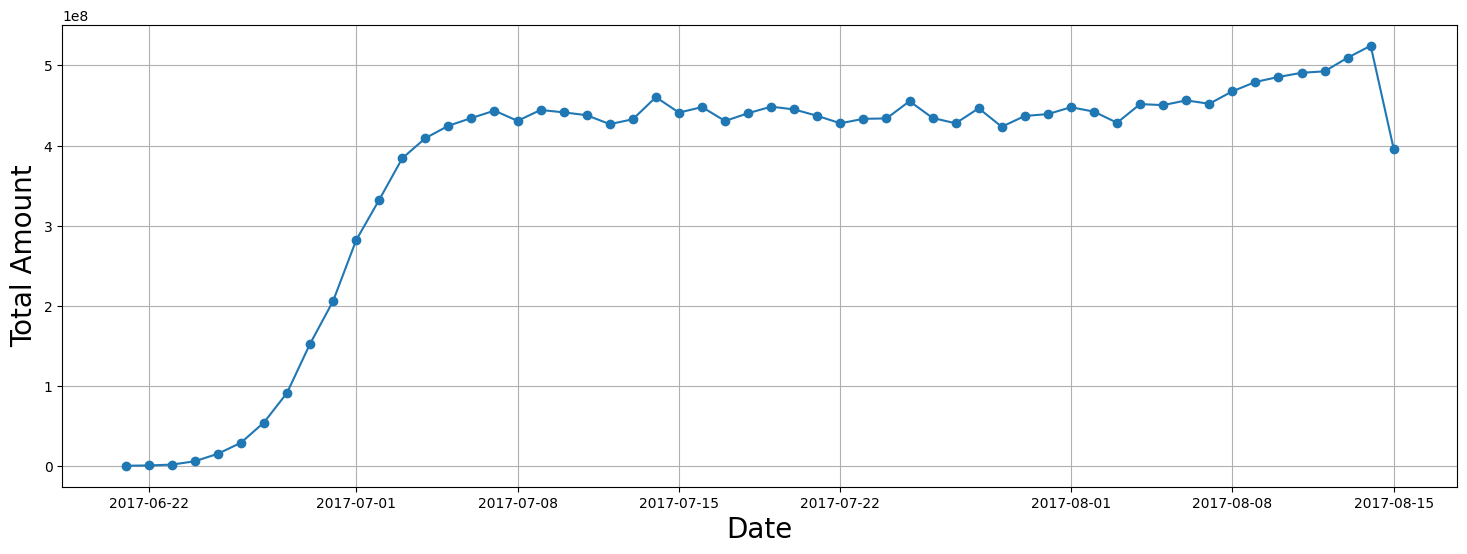

In [16]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings""", connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
y =  bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize = (18,6))
plt.plot(y.index,y['total_amount'], marker = 'o')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Total Amount', fontsize = 20)
plt.grid('b')
plt.show()

**Calculate the average charges for each aircraft with different fare conditions.**

<AxesSubplot:xlabel='aircraft_code', ylabel='avg_amount'>

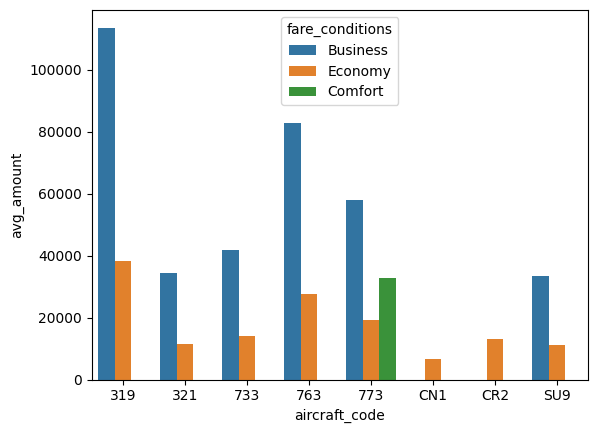

In [17]:
df = pd.read_sql_query(f"""SELECT fare_conditions, aircraft_code, AVG(amount) as avg_amount FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code, fare_conditions""", connection)

sns.barplot(data = df, x = 'aircraft_code', y ='avg_amount', hue = 'fare_conditions')

# Analyzing occupancy rate

**For each aircraft, calculate the total revenue per year and the average revenue per ticket.**

In [18]:
pd.set_option('display.float_format', str)

In [19]:
pd.read_sql_query(f"""SELECT aircraft_code, total_revenue, ticket_count, total_revenue/ticket_count as avg_revenue_per_ticket
                        FROM 
                        (SELECT aircraft_code, COUNT(*) as ticket_count, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code)""", connection)

,aircraft_code,total_revenue,ticket_count,avg_revenue_per_ticket
0,319,2706163100,52853,51201
1,321,1638164100,107129,15291
2,733,1426552100,86102,16568
3,763,4371277100,124774,35033
4,773,3431205500,144376,23765
5,CN1,96373800,14672,6568
6,CR2,1982760500,150122,13207
7,SU9,5114484700,365698,13985


**class wise average flight prices**

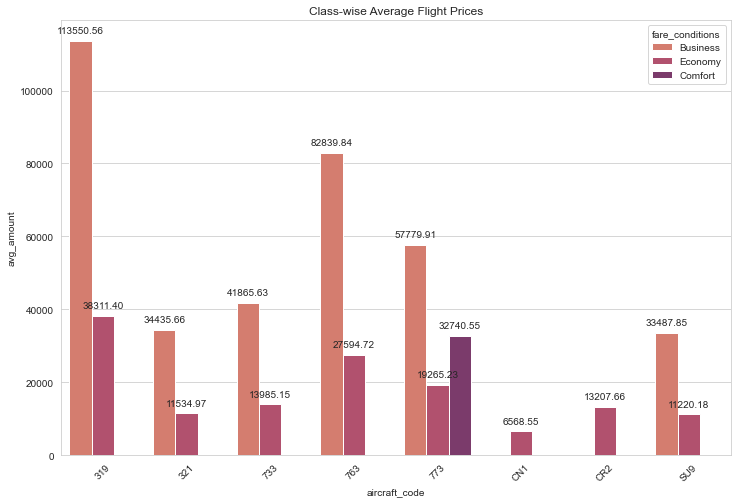

In [15]:
query = """
SELECT fare_conditions, aircraft_code, avg(amount) as avg_amount
FROM ticket_flights
JOIN flights ON ticket_flights.flight_id = flights.flight_id
GROUP BY aircraft_code, fare_conditions
"""

# Execute the query and fetch data into a DataFrame
df = pd.read_sql_query(query, connection)

# Save the DataFrame to a CSV file
df.to_csv('fare_avg_amount.csv', index=False)

# Create the bar plot
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='aircraft_code', y='avg_amount', hue='fare_conditions', data=df, palette='flare')

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Class-wise Average Flight Prices')
plt.xticks(rotation=45)
plt.show()

**Calculate the average occupancy per aircraft.**

In [20]:
occupancy_rate = pd.read_sql_query(f"""SELECT a.aircraft_code, AVG(a.seats_count) as booked_seats, b.num_seats, 
AVG(a.seats_count)/b.num_seats as occupancy_rate
                            FROM (
                                SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
                                FROM boarding_passes
                                INNER JOIN flights 
                                ON boarding_passes.flight_id=flights.flight_id
                                GROUP BY aircraft_code, flights.flight_id
                                ) as a INNER JOIN
                                (
                                SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                                GROUP BY aircraft_code  
                                ) as b
                                ON a.aircraft_code = b.aircraft_code
                            GROUP BY a.aircraft_code""", connection)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143
1,321,88.80923076923077,170,0.5224072398190045
2,733,80.25546218487395,130,0.617349709114415
3,763,113.93729372937294,222,0.5132310528350132
4,773,264.9258064516129,402,0.659019419033863
5,CN1,6.004431314623338,12,0.5003692762186115
6,CR2,21.48284690220174,50,0.42965693804403476
7,SU9,56.81211267605634,97,0.5856918832583128


**Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.**


In [21]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [22]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code""", connection)

occupancy_rate['Inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


# Conclusion:


**To sum up, examining revenue data , for example, total income each year, average income per ticket, and average inhabitance per airplane is basic for carriers looking to augment profitability. Airlines can track down regions for development and change their valuing and route designing because of evaluating these pointers. A more noteworthy inhabitance rate is one significant component that can upgrade benefit since it permits airline to boost income while limiting expenses related with empty seats. The airline should modify the cost for every airplane as the lower cost and high cost is additionally the element that individuals are not accepting tickets from those airplanes. They should conclude the sensible value as indicated by the condition and facility of the airplane and it should not be exceptionally low or high.**